### Projeto House rocket 

#### Descrição das variáveis

| Coluna | Descrição |
| :----- | --------: |
| id | Identificador do imóvel |
| date | Data que foi colocado a venda |
| price | Preço de compra do imóvel |
| bedrooms | Número de quartos |
| bathrooms | Número de banheiros |
| sqft_living | Tamanho da área de estar |
| sqft_lot | Tamanho total do terreno |
| view | Preço da motocicleta sem as taxas de seguro e registro |
| condition | Condição do imóvel |
| grade |  |
| sqft_above |  |
| sqft_basement | Tamanho do porão |
| yr_built | Ano de construção |
| yr_renovated | Ano da última reforma |
| zipcode | Localização |
| lat | Latitude |
| long | Longitude |
| sqft_living15 |  |
| sqft_lot15 |  |

#### Features 

In [171]:
data_all.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Packages

In [153]:
import pandas as pd # data handling
import numpy as np # numerical operations
import seaborn as sns #graphs
import matplotlib.pyplot as plt # graphs
import plotly.express as px # maps
from ipywidgets import widgets # interactive buttons of maps
from geopy.geocoders import Nominatim
import time # time for processing
from multiprocessing import Pool # multiprocessing
import defs # API request

#### Functions

In [4]:
def get_data(data):
    data_all = pd.read_csv(data)
    # date
    data_all['date'] = pd.to_datetime(data_all['date'], format = '%Y-%m-%d')
    return data_all

In [5]:
# Classificando imóveis em boas condições e com preço menor que a mediana do zip code que devem ser comprados.
def classify(data):
    data['status'] = 'NA'
    for i in range(len(data)):
            if (data.loc[i, 'price_sale'] < data.loc[i, 'price_median']) & (data.loc[i, 'condition'] >= 3):
                data.loc[i,'status'] = 'comprar'
            else:
                data.loc[i,'status'] = 'não comprar'
    return data

In [170]:
# Função para requisição da API criada com formato .py
#import time
#from geopy.geocoders import Nominatim

#geolocator = Nominatim (user_agent='geopyExercises')

#def get_data(x):
#    index, row = x
#    time.sleep(1)

#    response = geolocator.reverse(row['query'])
#    address = response.raw['address']

#    road = address['road'] if 'road' in address else 'NA'
#    neighbourhood = address['neighbourhood'] if 'neighbourhood' in address else 'NA'
#    town = address['town'] if 'town' in address else 'NA'

#    return road, neighbourhood, town

#### Extraction

In [6]:
data_all = get_data('kc_house_data.csv')
data_all.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# suprimir anotação cientifica 
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
# explorar dados
data_all.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


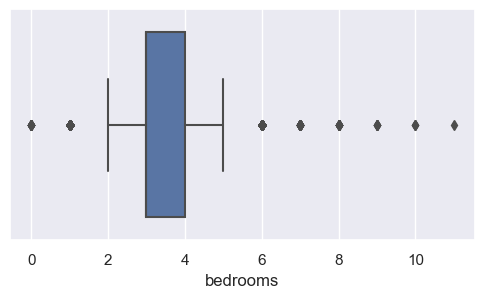

In [11]:
# Boxplot para conferir a distribuição de variáveis
sns.set(rc = {'figure.figsize':(6,3)})
sns.boxplot(data = data_all,x = 'bedrooms');

In [9]:
# Remover outliers identificado no número de quartos
# O maior imóvel do dataset possui área maior e menos quartos. Provavelmente um erro de digitação
data_all[(data_all['bedrooms'] == 33) | (data_all['sqft_living'] == 13540)] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.00,7,8.00,13540,307752,3.00,0,4,...,12,9410,4130,1999,0,98053,47.67,-121.99,4850,217800
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [10]:
data_all.drop(data_all[data_all['bedrooms'] == 33].index, inplace=True)

#### Transformation

In [19]:
# mediana por zip code 
df = data_all[['price','zipcode']].groupby('zipcode').median().sort_values(by='price', ascending=True).reset_index()
# agrupando dados
data = pd.merge(df,data_all, on='zipcode')
# renomeando novas colunas do dataframe
data.rename(columns={'price_x' : 'price_median', 'price_y': 'price_sale'}, inplace=True)

In [20]:
data['price_sale']/(data['sqft_lot']/10.764)

0        206.54
1        533.96
2        291.23
3        368.03
4        841.63
          ...  
21607   1616.23
21608   1121.67
21609   2983.37
21610   2138.05
21611   2282.01
Length: 21612, dtype: float64

In [21]:
# Classificando imóveis em boas condições e com preço menor que a mediana do zip code que devem ser comprados.
data['status'] = 'NA'
for i in range(len(data)):
    if (data.loc[i, 'price_sale'] < data.loc[i, 'price_median']) & (data.loc[i, 'condition'] >= 3):
        data.loc[i,'status'] = 'comprar'
    else:
        data.loc[i,'status'] = 'não comprar'     
data.head()

,zipcode,price_median,id,date,price_sale,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,status
0,98002,235000.00,16000397,2014-12-05,189000.00,2,1.00,1200,9850,1.00,...,7,1200,0,1921,0,47.31,-122.21,1060,5095,comprar
1,98002,235000.00,1202000200,2014-11-03,233000.00,3,2.00,1710,4697,1.50,...,6,1710,0,1941,0,47.30,-122.22,1030,4705,comprar
2,98002,235000.00,6131600075,2015-04-27,225000.00,3,1.00,1300,8316,1.00,...,6,1300,0,1954,0,47.32,-122.22,1260,8316,comprar
3,98002,235000.00,3021059276,2015-03-14,250000.00,4,2.00,2010,7312,1.00,...,7,2010,0,1976,0,47.28,-122.21,2010,7650,não comprar
4,98002,235000.00,8669160310,2014-12-09,266000.00,3,2.50,1805,3402,2.00,...,7,1805,0,2009,0,47.35,-122.21,2095,3402,não comprar


In [22]:
# criando novo dataset apenas com os imóveis que devem ser comprados
buy_data = data[data['status'] == 'comprar'][['id', 'zipcode', 'date', 'price_sale', 'condition']]
# mediana por zipcode com imóveis comprados
new_data = buy_data[['price_sale','zipcode']].groupby('zipcode').median().sort_values(by='price_sale', ascending=True).reset_index()
# agrupando dados com mediana dos imóveis comprados por zip code
data_median = pd.merge(buy_data,new_data, on='zipcode')
# renomeando novas colunas do dataframe
data_median = data_median.rename(columns={'price_sale_x' : 'price', 'price_sale_y': 'price_median'})
data_median

,id,zipcode,date,price,condition,price_median
0,16000397,98002,2014-12-05,189000.00,4,198475.00
1,1202000200,98002,2014-11-03,233000.00,5,198475.00
2,6131600075,98002,2015-04-27,225000.00,4,198475.00
3,9500900135,98002,2014-10-21,200000.00,4,198475.00
4,6131600060,98002,2014-08-15,214000.00,4,198475.00
...,...,...,...,...,...,...
10574,3025300225,98039,2014-10-31,1450000.00,4,1398000.00
10575,2470200020,98039,2014-05-14,1880000.00,4,1398000.00
10576,3625049079,98039,2014-08-01,1350000.00,3,1398000.00
10577,5427100150,98039,2014-06-26,1410000.00,3,1398000.00


In [23]:
# criando coluna mês para classificar a estação a venda
data_median['month'] = data_median['date'].dt.month
data_median['season'] = data_median['month'].apply(lambda x: 'Primavera' if (x == 3) or (x == 4) or (x == 5) else
                                                             'Verão' if (x == 6) or (x == 7) or (x == 8) else
                                                             'Outono' if (x == 9) or (x == 10) or (x == 1)  else 'Inverno')  

In [24]:
# Classificar o novo preço de acordo com sazonalidade
data_median['price_for_sale'] = 'NA'
for i in range(len(data_median)):
        if (data_median.loc[i, 'price'] < data_median.loc[i, 'price_median']) & (data_median.loc[i, 'season'] == 'Verão') or (data_median.loc[i, 'season'] == 'Primavera'):
            data_median.loc[i,'price_for_sale'] = (data_median.loc[i, 'price']*0.3) + (data_median.loc[i, 'price'])
        elif (data_median.loc[i, 'price'] > data_median.loc[i, 'price_median']) & (data_median.loc[i, 'season'] == 'Verão') or (data_median.loc[i, 'season'] == 'Primavera'):
             data_median.loc[i,'price_for_sale'] = (data_median.loc[i, 'price']*0.1) + (data_median.loc[i, 'price'])
        else:
            data_median.loc[i,'price_for_sale'] = (data_median.loc[i, 'price']*0.1) + (data_median.loc[i, 'price'])

In [25]:
# Calculando a lucratividade 
# subtração do valor de venda pelo valor comprado
data_median['positive_balance'] = 'NA'
for i in range(len(data_median)):
    data_median['positive_balance'] = (data_median['price_for_sale']) - (data_median['price'])
    
round(data_median['positive_balance'].sum(),2)# Lucro estimado de $ 748.289.226,40

748289226.4

In [26]:
# Criar relatório com as sugestões de apartamento por um valor recomendado de compra, e o valor recomendado de venda
relatorio = data_median[['id', 'zipcode', 'season', 'price','price_for_sale','positive_balance']]
relatorio.head()

,id,zipcode,season,price,price_for_sale,positive_balance
0,16000397,98002,Inverno,189000.00,207900.00,18900.00
1,1202000200,98002,Inverno,233000.00,256300.00,23300.00
2,6131600075,98002,Primavera,225000.00,292500.00,67500.00
3,9500900135,98002,Outono,200000.00,220000.00,20000.00
4,6131600060,98002,Verão,214000.00,235400.00,21400.00


#### Load

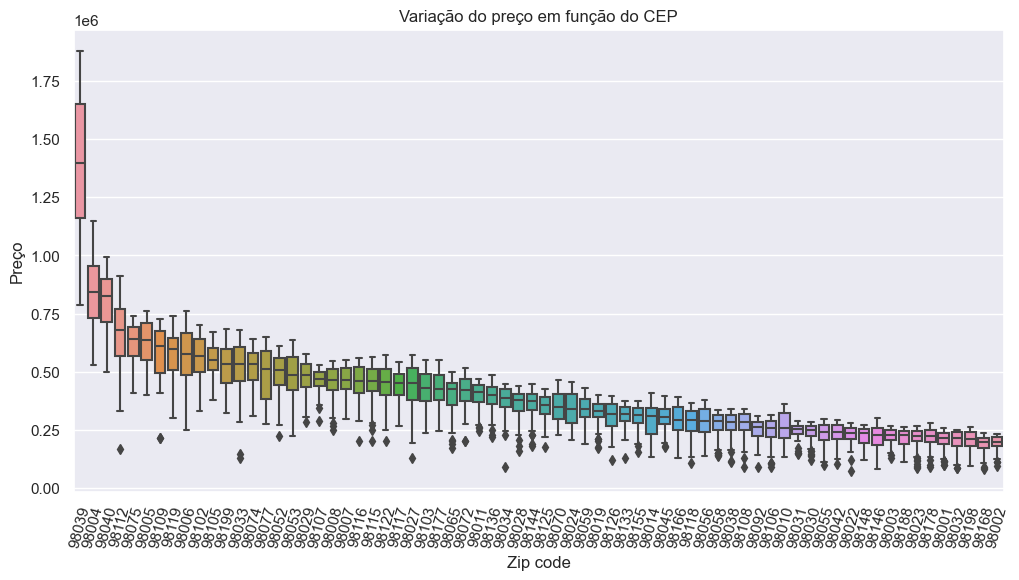

In [27]:
# Variação do preço por zipcode
sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.boxplot(
    data=data_median,
    x='zipcode',
    y='price',
    order=data_median.sort_values('price_median', ascending=False)['zipcode'].unique());

ax.set(title='Variação do preço em função do CEP',
      xlabel = 'Zip code',
      ylabel = 'Preço');

plt.xticks(rotation=75);

In [30]:
# preparando o dataset para o mapa
gps = data_all[['id', 'lat', 'long']]
relatorio_geo = pd.merge(relatorio, gps, how='left', on = 'id')
relatorio_geo['price_for_sale'] = relatorio_geo['price_for_sale'].astype(float)
relatorio_geo['positive_balance'] = relatorio_geo['positive_balance'].astype(float)

,id,zipcode,season,price,price_for_sale,positive_balance,lat,long
0,16000397,98002,Inverno,189000.00,207900.00,18900.00,47.31,-122.21
1,1202000200,98002,Inverno,233000.00,256300.00,23300.00,47.30,-122.22
2,6131600075,98002,Primavera,225000.00,292500.00,67500.00,47.32,-122.22
3,9500900135,98002,Outono,200000.00,220000.00,20000.00,47.29,-122.21
4,6131600060,98002,Verão,214000.00,235400.00,21400.00,47.32,-122.22
...,...,...,...,...,...,...,...,...
10795,3025300225,98039,Outono,1450000.00,1595000.00,145000.00,47.62,-122.23
10796,2470200020,98039,Primavera,1880000.00,2444000.00,564000.00,47.62,-122.24
10797,3625049079,98039,Verão,1350000.00,1755000.00,405000.00,47.62,-122.24
10798,5427100150,98039,Verão,1410000.00,1551000.00,141000.00,47.63,-122.23


In [181]:
# mapa com imoveis que devem ser comprados
fig = px.scatter_mapbox( relatorio_geo,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price_for_sale',
                        color = 'season',
                        size_max = 15,
                        zoom = 10, 
                        color_continuous_scale="aggrnyl_r")

fig.update_layout (mapbox_style = 'open-street-map')
fig.update_layout( height=600, margin= {'r': 0, 'l':0, 'b':0, 't':0} )
fig.show()

In [234]:
#iterative buttons
price_limit = widgets.IntSlider(
value = 540000,
min = 75000,   #data['price'].min()
max = 7700000, #data['price'].max()
step = 1,
description='Maximum price',
disable = False)

In [239]:
widgets.interactive(update_map, df=data_all, limit=price_limit)

ValueError: cannot find widget or abbreviation for argument: 'data'

## Hipóteses de negócio

#### H1 - Imóveis que possuem vista para água são 20% mais caros? 

In [57]:
data_price_waterfront = data_all[['id', 'zipcode', 'date', 'price', 'waterfront','sqft_lot']]
# Imóveis com vista para a água
with_waterfront = data_price_waterfront[data_price_waterfront['waterfront'] == 1]
# Imóveis sem vista para a água
without_waterfront = data_price_waterfront[data_price_waterfront['waterfront'] == 0]

# imóveis que possuem vista para água são 20% mais caros?
with_waterfront['price'].median() > (without_waterfront['price'].median()) + (with_waterfront['price'].median()*0.2)

True

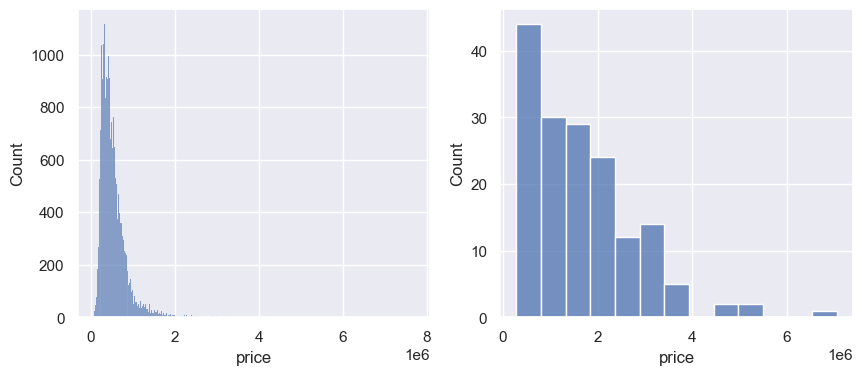

In [58]:
# Histogramas dos preços dos imóveis sem e com vista para a água
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.histplot(data=without_waterfront, x='price', ax=ax[0])
sns.histplot(data=with_waterfront, x='price', ax=ax[1]);

#### H2 - Imóveis com data de construção menor que 1955, são 50% mais baratos na média?

In [60]:
# change date format
data_test = data_all[['id','date', 'price', 'yr_built']]
after_50 = data_test[data_test['yr_built'] > 1955]
before_50 = data_test[data_test['yr_built'] < 1955]
(before_50['price'].median()) < (after_50['price'].median())-(after_50['price'].mean()*0.5)

False

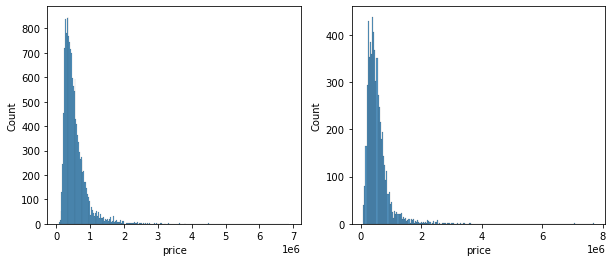

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.histplot(data=after_50, x='price', ax=ax[0])
sns.histplot(data=before_50, x='price', ax=ax[1]);

#### H3 - O crescimento do preço dos imóveis YoY (year over year) é de 10% ?

In [176]:
# o crescimento do preço dos imóveis YoY (year over year) é de 10% ?
data_yoy = data_all[['yr_built','price']].groupby('yr_built').mean().sort_values(by='yr_built', ascending=True).reset_index()
percent = data_yoy['price'].pct_change()

In [177]:
data_yoy = pd.merge(data_yoy, percent, left_index=True, right_index=True)
data_yoy.rename(columns={'price_x' : 'price', 'price_y': 'percent_yoy'}, inplace=True)

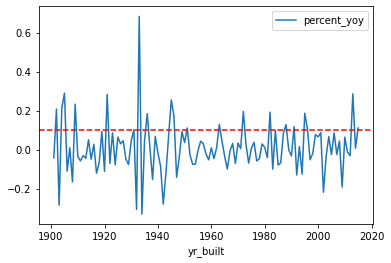

In [178]:
ax = data_yoy.plot(x='yr_built',y='percent_yoy')
# 10% percent line
ax.axhline(0.1, color="red", linestyle="--")
plt.show()

#### H4 - O preço aumenta conforme o tamanho do imóvel aumenta? 


In [74]:
size_price = data_all[['price', 'sqft_lot']]

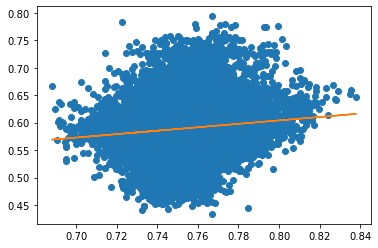

In [54]:
#Log para melhorar a visualização
x = np.log10(size_price['price'])
y = np.log10(size_price['sqft_lot'])

#create basic scatterplot
plt.plot(x, y, 'o')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()

In [160]:
#x = np.log10(size_price['price'])
#y = np.log10(size_price['sqft_lot'])

#ax = sns.scatterplot(data = size_price, x = y, y = x)
    
#ax = ax.set(
#    title='Relationship with imovel size and price',
#    xlabel='Size',
#    ylabel='Price',
#     ylim=(55, 120), # Ajustando escala do eixo y)

#### H5 - O saldo positivo da venda, em média, é maior no inverno? 

In [181]:
season_price = relatorio_geo[['season','id', 'price', 'price_for_sale','positive_balance']].groupby('season').agg({'id':'count', 'price':'mean','price_for_sale':'mean', 
                                                                                                                   'positive_balance':'mean'}).rename(columns={'id':'count'}).sort_values(by='positive_balance',ascending=False).reset_index()
season_price

,season,count,price,price_for_sale,positive_balance
0,Primavera,3012,391554.38,509020.69,117466.31
1,Verão,3217,389005.80,461942.29,72936.49
2,Outono,2431,380786.33,418864.96,38078.63
3,Inverno,2140,376489.34,414138.27,37648.93


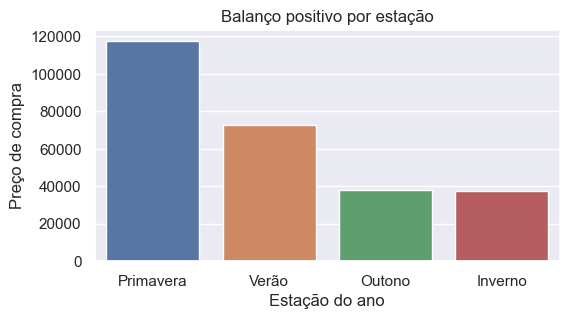

In [225]:
ax = sns.barplot(data = season_price,
           x = 'season',
           y = 'positive_balance')

ax.set(xlabel='Estação do ano', ylabel='Preço de compra', title='Balanço positivo por estação');

#### H6 - Quais são os endereços dos cinco códigos postais com maior balanço positivo médio?

In [159]:
# criando a média dos valor de compra, de revenda e o balanço positivo com a contagem do número de casas pelo cep
zipcode_price = relatorio_geo[['zipcode','id', 'price', 'price_for_sale','positive_balance']].groupby('zipcode').agg({'id':'count', 'price':'mean','price_for_sale':'mean','positive_balance':'mean'}).rename(columns={'id':'count'}).sort_values(by='positive_balance',ascending=False).reset_index()
top_five = zipcode_price.head(5)
top_five

,zipcode,count,price,price_for_sale,positive_balance
0,98039,27,1343287.04,1611258.33,267971.30
1,98040,139,809211.27,969688.39,160477.12
2,98004,157,845424.55,1003209.15,157784.60
3,98112,132,666343.13,780506.95,114163.82
4,98075,181,621618.80,734489.02,112870.22


In [160]:
# Colocando as coordenadas e removendo as duplicatas no dataset topfive
gps_zip = data_all[['zipcode', 'lat', 'long']]
top_five = pd.merge(top_five,gps_zip, how="left").drop_duplicates("count")

In [174]:
top_five['query'] = top_five[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis = 1 )
df1 = top_five[['zipcode','query']]

p = Pool(3)

start = time.process_time()
df1[['road','neighbourhood','town']] = p.map(defs.get_data, df1.iterrows())
df1.drop('query', inplace=True, axis=1)

C:\Users\Cliente\AppData\Local\Temp\ipykernel_5824\2850072106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['road','neighbourhood','town']] = p.map(defs.get_data, df1.iterrows())
C:\Users\Cliente\AppData\Local\Temp\ipykernel_5824\2850072106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['road','neighbourhood','town']] = p.map(defs.get_data, df1.iterrows())
C:\Users\Cliente\AppData\Local\Temp\ipykernel_5824\2850072106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [178]:
df_address = pd.merge(top_five,df1, how="left", on = 'zipcode')
df_address

,zipcode,count,price,price_for_sale,positive_balance,lat,long,query,road,neighbourhood,town
0,98039,27,1343287.04,1611258.33,267971.30,47.62,-122.23,"47.6172,-122.23",Northeast 8th Street,Eastland,NA
1,98040,139,809211.27,969688.39,160477.12,47.53,-122.23,"47.5316,-122.233",79th Avenue Southeast,NA,Mercer Island
2,98004,157,845424.55,1003209.15,157784.60,47.58,-122.19,"47.5815,-122.192",111th Avenue Southeast,NA,NA
3,98112,132,666343.13,780506.95,114163.82,47.62,-122.31,"47.6221,-122.314",East Harrison Street,NA,NA
4,98075,181,621618.80,734489.02,112870.22,47.58,-121.99,"47.5822,-121.987",263rd Place Southeast,Tibbetts Station,Sammamish
